In [1]:

import pandas as pd
import category_encoders as ce


import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_dataset = pd.read_csv(r'C:\Users\tando\Downloads\archive (8)\data.csv')

In [3]:
train_dataset.head(10)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
5,1.000072e+19,0,14102100,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,...,1,0,16920,320,50,1899,0,431,100077,117
6,1.000072e+19,0,14102100,1005,0,8fda644b,25d4cfcd,f028772b,ecad2386,7801e8d9,...,1,0,20362,320,50,2333,0,39,-1,157
7,1.000092e+19,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,0,20632,320,50,2374,3,39,-1,23
8,1.000095e+19,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15707,320,50,1722,0,35,-1,79
9,1.000126e+19,0,14102100,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,0,21689,320,50,2496,3,167,100191,23


In [4]:
train_dataset.shape

(40428967, 24)

### EDA

In [5]:
train_dataset.describe(include= 'all')

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,40428967,40428967,40428967,40428967,40428967,...,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07
unique,NaN,NaN,NaN,NaN,NaN,4737,7745,26,8552,559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,14596137,15131739,16537234,25832830,27237087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.223017e+18,1.698056e-01,1.410256e+07,1.004968e+03,2.880146e-01,NaN,NaN,NaN,NaN,NaN,...,1.015305e+00,3.313150e-01,1.884181e+04,3.188831e+02,6.010201e+01,2.112601e+03,1.432499e+00,2.271444e+02,5.321685e+04,8.338229e+01
std,5.325443e+18,3.754620e-01,2.966837e+02,1.094586e+00,5.063820e-01,NaN,NaN,NaN,NaN,NaN,...,5.274336e-01,8.547935e-01,4.959457e+03,2.127250e+01,4.729538e+01,6.094124e+02,1.326227e+00,3.510221e+02,4.995682e+04,7.028996e+01
min,5.211594e+11,0.000000e+00,1.410210e+07,1.001000e+03,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,4.611181e+18,0.000000e+00,1.410230e+07,1.005000e+03,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,0.000000e+00,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,9.223224e+18,0.000000e+00,1.410260e+07,1.005000e+03,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,0.000000e+00,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,1.000480e+05,6.100000e+01
75%,1.383561e+19,0.000000e+00,1.410281e+07,1.005000e+03,1.000000e+00,NaN,NaN,NaN,NaN,NaN,...,1.000000e+00,0.000000e+00,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,1.000930e+05,1.010000e+02


In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                float64
 1   click             int64  
 2   hour              int64  
 3   C1                int64  
 4   banner_pos        int64  
 5   site_id           object 
 6   site_domain       object 
 7   site_category     object 
 8   app_id            object 
 9   app_domain        object 
 10  app_category      object 
 11  device_id         object 
 12  device_ip         object 
 13  device_model      object 
 14  device_type       int64  
 15  device_conn_type  int64  
 16  C14               int64  
 17  C15               int64  
 18  C16               int64  
 19  C17               int64  
 20  C18               int64  
 21  C19               int64  
 22  C20               int64  
 23  C21               int64  
dtypes: float64(1), int64(14), object(9)
memory usage: 7.2+ GB


In [6]:
train_dataset.isnull().sum()

id                  0
click               0
hour                0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
dtype: int64

0    0.830194
1    0.169806
Name: click, dtype: float64




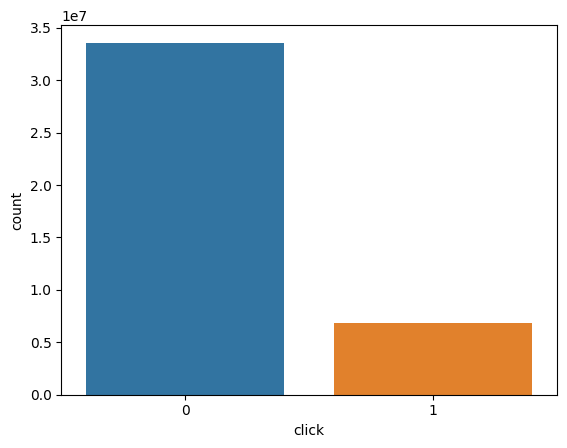

In [7]:
print(train_dataset.click.value_counts(normalize = True))
print("\n")
plt.figure()
sns.countplot(x='click', data=train_dataset)
plt.show()

/tmp/ipykernel_34/1319980732.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_dataset.corr()


Text(0.5, 1.05, 'Pearson correlation of Features')

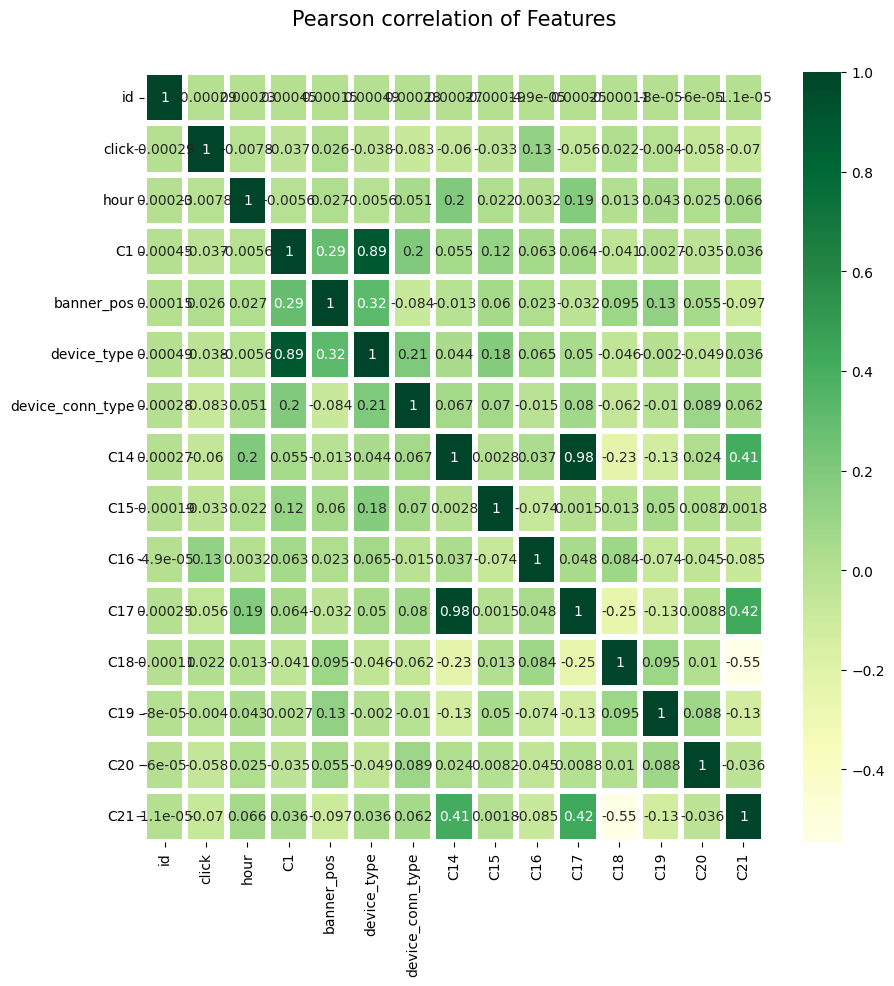

In [8]:
# Pearson correlation table to find the relationship with output with all input features. 

corr = train_dataset.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

In [9]:
# checking missing data
total = train_dataset.isnull().sum().sort_values(ascending = False)
percent = (train_dataset.isnull().sum()/train_dataset.isnull().count()*100).sort_values(ascending = False)
missing__train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing__train_data.head(10)

,Total,Percent
id,0,0.0
click,0,0.0
C20,0,0.0
C19,0,0.0
C18,0,0.0
C17,0,0.0
C16,0,0.0
C15,0,0.0
C14,0,0.0
device_conn_type,0,0.0


In [10]:
train_dataset.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [11]:
train_dataset.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [12]:
## Dropping few categorical columns
train_dataset.drop(['C18','C20'], axis=1, inplace = True)

In [ ]:
# train_dataset.rename(columns={'click': 'y'},inplace=True, errors='raise')

In [ ]:
### Features and Label & split dataset

In [13]:
X = train_dataset.drop(['click'], axis=1)
y = train_dataset['click']

In [15]:
X.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C19,C21
0,1.000009e+18,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,ddd2926e,44956a24,1,2,15706,320,50,1722,35,79
1,1.000017e+19,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,96809ac8,711ee120,1,0,15704,320,50,1722,35,79
2,1.000037e+19,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,b3cf8def,8a4875bd,1,0,15704,320,50,1722,35,79
3,1.000064e+19,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,e8275b8f,6332421a,1,0,15706,320,50,1722,35,79
4,1.000068e+19,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,...,9644d0bf,779d90c2,1,0,18993,320,50,2161,35,157


0    0.830194
1    0.169806
Name: click, dtype: float64




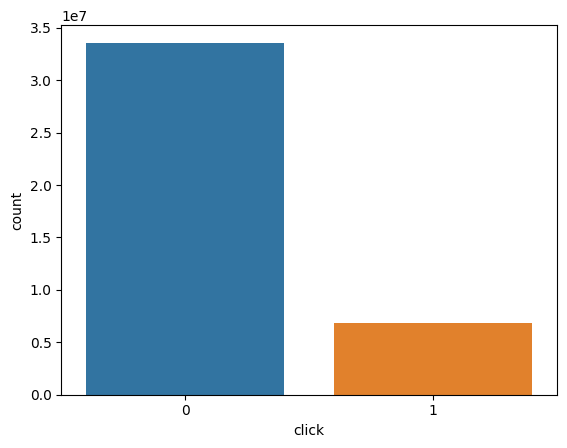

In [16]:
print(train_dataset.click.value_counts(normalize = True))
print("\n")
plt.figure()
sns.countplot(x=y)
plt.show()

In [ ]:
## Preparing dataset for model training

In [ ]:
target_encoder = ce.TargetEncoder()
X = target_encoder.fit_transform(X, y)

In [ ]:
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size= 0.3, random_state= 42)


In [23]:
X_train.shape

(28300276, 21)

In [24]:
X_test.shape

(12128691, 21)

In [25]:
y_train.shape

(28300276,)

In [26]:
y_test.shape

(12128691,)

In [27]:
### Simple regression model

In [28]:
X_train.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C19,C21
1735218,1.730245e+19,14102108,1005,1,0.296324,0.258357,0.179579,0.198610,0.194877,0.199148,...,0.141281,0.224491,1,0,19251,320,50,2201,35,43
3351567,1.353123e+19,14102117,1002,0,0.264822,0.122750,0.128580,0.198610,0.194877,0.199148,...,0.217303,0.201350,0,0,17081,320,50,1921,47,23
13183574,1.761847e+18,14102322,1005,0,0.118826,0.122750,0.128580,0.194584,0.194557,0.108118,...,0.145719,0.172533,1,0,4687,320,50,423,39,32
8240488,1.103293e+19,14102216,1005,1,0.280121,0.274370,0.179579,0.198610,0.194877,0.199148,...,0.215900,0.166532,1,0,21827,320,50,2522,35,221
427302,7.084684e+18,14102102,1005,0,0.205633,0.205633,0.208019,0.198610,0.194877,0.199148,...,0.213429,0.224491,1,0,15702,320,50,1722,35,79


In [29]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  isetter(loc, value[:, i].tolist())


,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C19,C21
1735218,0.937967,0.008667,0.363636,0.142857,0.340486,0.313543,0.344240,0.206895,0.304129,0.759950,...,0.141426,0.349635,0.2,0.0,0.797229,0.221239,0.02988,0.789494,0.001038,0.165354
3351567,0.733529,0.018418,0.090909,0.000000,0.304289,0.148970,0.244237,0.206895,0.304129,0.759950,...,0.217525,0.313593,0.0,0.0,0.705579,0.221239,0.02988,0.683673,0.007269,0.086614
13183574,0.095510,0.240520,0.363636,0.000000,0.136535,0.148970,0.244237,0.202701,0.303628,0.398945,...,0.145867,0.268712,0.2,0.0,0.182118,0.221239,0.02988,0.117536,0.003115,0.122047
8240488,0.598096,0.125677,0.363636,0.142857,0.321868,0.332976,0.344240,0.206895,0.304129,0.759950,...,0.216120,0.259367,0.2,0.0,0.906027,0.221239,0.02988,0.910809,0.001038,0.866142
427302,0.384061,0.002167,0.363636,0.000000,0.236278,0.249556,0.400008,0.206895,0.304129,0.759950,...,0.213647,0.349635,0.2,0.0,0.647337,0.221239,0.02988,0.608466,0.001038,0.307087


In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [31]:
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test.head(2)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  """Entry point for launching an IPython kernel.

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  isetter(loc, value[:, i].tolist())


,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C19,C21
27112644,0.784453,0.758397,0.363636,0.0,0.136535,0.14897,0.244237,0.050222,0.075238,0.398945,...,0.068721,0.106527,0.2,0.0,0.896904,0.221239,0.02988,0.894936,0.137072,0.236220
32015945,0.771958,0.781148,0.363636,0.0,0.136535,0.14897,0.244237,0.011644,0.037114,0.339945,...,0.133576,0.027046,0.2,0.6,0.860582,0.221239,0.02988,0.673847,0.336449,0.393701


In [32]:
y_pred = model.predict(X_test)


In [33]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
metrics.accuracy_score(y_test, y_pred)

0.8489254941031972